<a href="https://colab.research.google.com/github/komal-SkyNET/datastructures-algorithms/blob/master/problems/trapping_rain_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

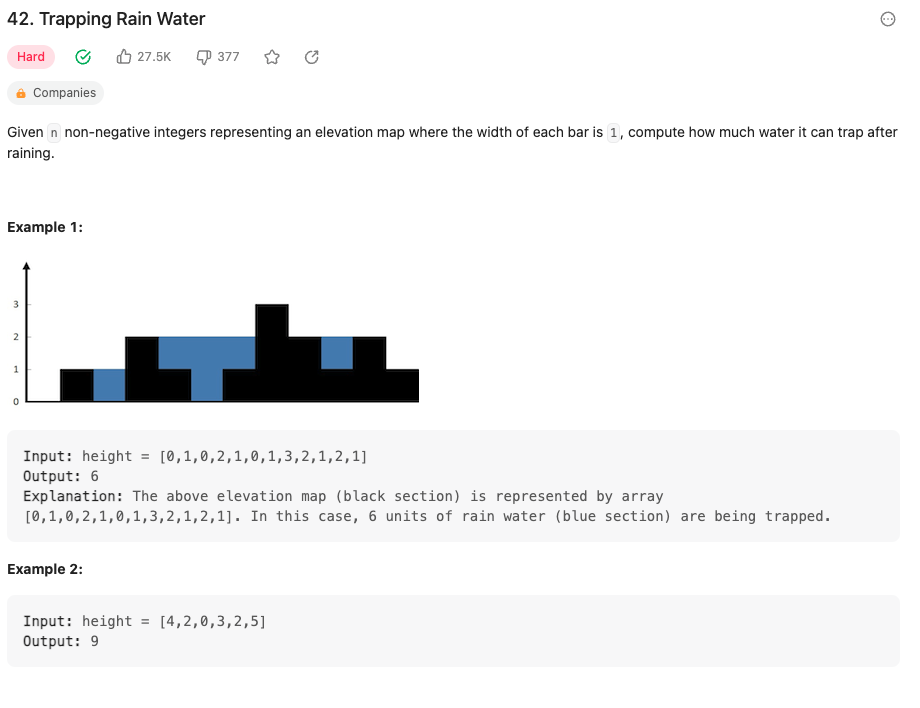

## Intuition/approach
- We need min 3 block to "trap" water
- Maintain a descending monotonic stack (of indices) - keep adding bars to the stack. In these notes, we refer to index of elements when we say push the element to the stack.
- Push to stack when incoming_bar is < top of stack
- When new bar arrives that is greater than top of stack, pop elements from stack and calculate "trapped" water. In other words, water can be trapped with certainty due to the monotonicity of descending stack. Continue popping elements from stack until new bar can be added.
- Use `index[-2]` to refer to left bound of the water trap. So `min(left_bound, incoming_bar) - height_of_bar_popped_from_stack` will be the height of water trapped, multiply that value with the index spread to get the full water trapped.


In [67]:
class Solution:
    def trap(self, height):
      index = []
      tallest_block = 0
      water_caught = 0
      for i, new_incoming_block in enumerate(height):
        if index and height[index[-1]] < new_incoming_block:
          while len(index) > 1 and height[index[-1]] < new_incoming_block: # >1 because any less than that - we can't trap water - we need min three blocks (2 exitsing + new_incoming_block)
            """
            index[-2] refers to the left hand side bound of the water trap, index[-1] is the dip where the water will be captured. For instance, in [12,5,17] - 17 is the incoming bar. index[-2] bar is 12 and index[-1] bar is 1
            max(blah, 0) - is just to handle negative values that might come up from cases like [0,3,2,5] - 0,3 will get into the stack due to requiring min 2 blocks inside the stack to trap water. So when 5 comes in, and the popping loop begins and we get caught in case like min(0,5) for bounded hight of water captured.
            """
            water_caught = water_caught + ((i - index[-2] - 1) * max(min(height[index[-2]] , new_incoming_block) - height[index[-1]], 0))
            index.pop()
        index.append(i)
      return water_caught

s = Solution()
s.trap([0,3,2,5]) # answer accepted in leet

1